# Mobile Phone Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('/Users/ludovica/Desktop/Final Project Dataset/App/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Cleaning Data

In [3]:
df.shape

(2000, 21)

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


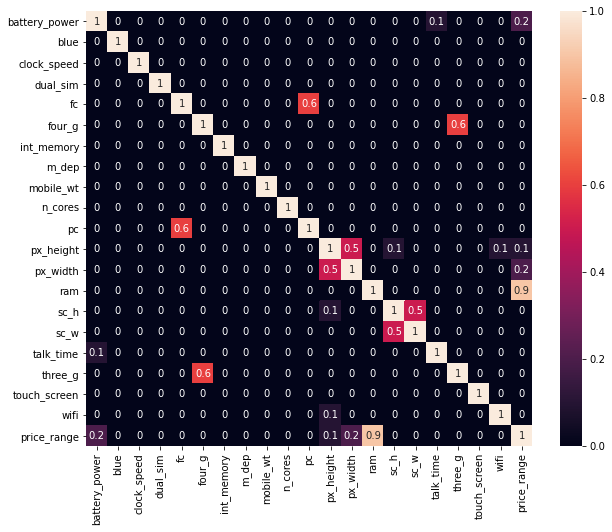

In [10]:

plt.figure(figsize=(10,8))
corr_heatmap = sns.heatmap(abs(df.corr()).round(1),annot=True)
plt.show()

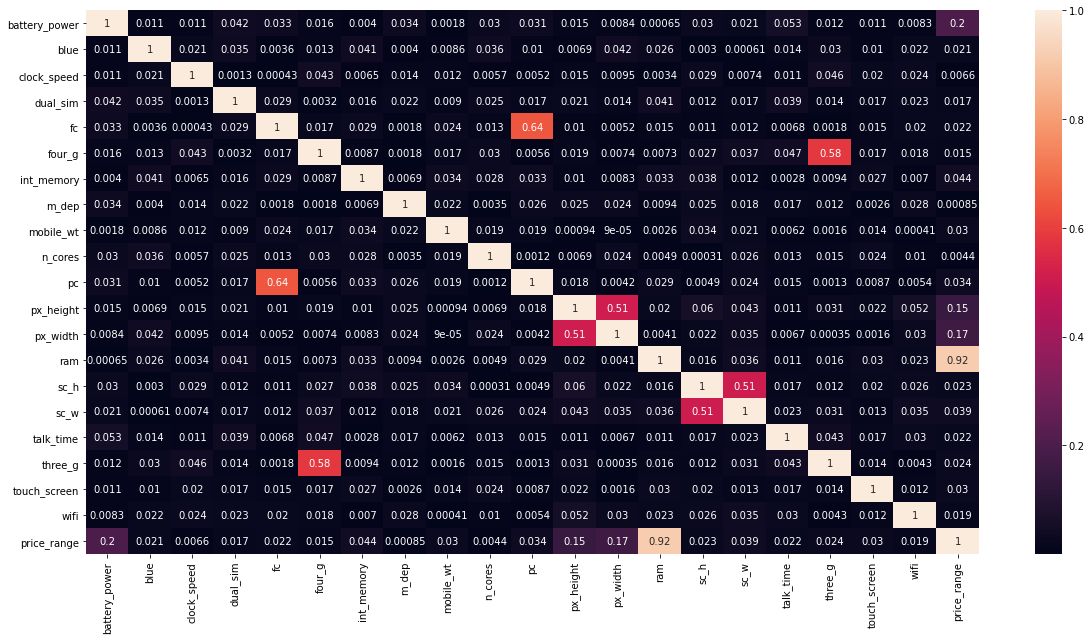

In [11]:
plt.figure(figsize=(20,10))

sns.heatmap(abs(df.corr()),annot=True)


The dataset has:
    - rawas: 2000, columns: 21
    - there are not null values
    - multicollinearity looks ok except for 'three_g & four_g' and 'pc & fc'

# Exploratory Analysis

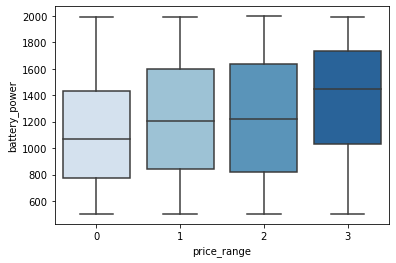

In [12]:
# library & dataset
import seaborn as sns
sns.boxplot( x=df["price_range"], y=df["battery_power"],palette="Blues" )
#sns.plt.show()


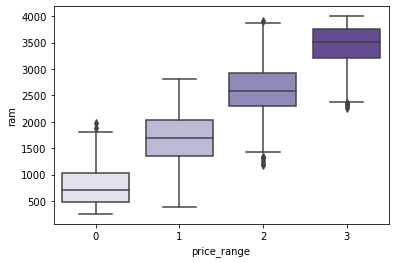

In [13]:
# library & dataset
import seaborn as sns
sns.boxplot( x=df["price_range"], y=df["ram"],palette="Purples" )
#sns.plt.show()


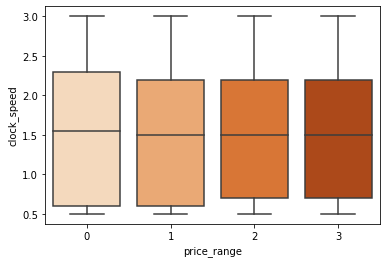

In [14]:
import seaborn as sns
sns.boxplot( x=df["price_range"], y=df["clock_speed"],palette="Oranges" )
#sns.plt.show()

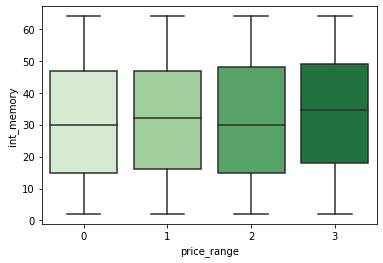

In [15]:
import seaborn as sns
sns.boxplot( x=df["price_range"], y=df["int_memory"],palette="Greens" )
#sns.plt.show()

Mobile phones in the higher price ranges have better features in terms of battery power and ram

# Modeling Part

>Machine Learning: learn from data via recognizing patterns, to make predictions or decisions
>>Supervised Learning: we have training data for which we know the class or value of the output
>>>Classification: multi-class classification problem. In these cases, our outcome is discrete: it can only take certain values, whether these values be integers (counting numbers: 1, 2, 3..) or classes (dog, cat, bird). 

In [16]:
X=df.drop('price_range',axis=1)

In [17]:
X_train,X_test,y_train,y_test = train_test_split(
df.drop('price_range',axis=1),
df.price_range,
test_size=1/3,
random_state=42,
stratify = df.price_range
)

In [18]:
df.price_range.value_counts(normalize=True)

3    0.25
2    0.25
1    0.25
0    0.25
Name: price_range, dtype: float64

In [19]:
y_train.value_counts(normalize=True)

1    0.250563
3    0.249812
2    0.249812
0    0.249812
Name: price_range, dtype: float64

In [20]:
y_test.value_counts(normalize=True)

3    0.250375
2    0.250375
0    0.250375
1    0.248876
Name: price_range, dtype: float64

# Models

## Logistic Regression

In [21]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
X_train1=scaler.transform(X_train)
X_test1=scaler.transform(X_test)

# Models

In [23]:
model1=LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
model1.fit(X_train1,y_train)
y_pred1=model1.predict(X_test1)
confusion_matrix(y_test, y_pred1)
display(confusion_matrix(y_test, y_pred1))
print("Precision Score : ",precision_score(y_test,y_pred1,pos_label='positive', average='macro'))
print("Recall Score : ",accuracy_score(y_test,y_pred1))
print("F1 Score : ",f1_score(y_test, y_pred1,average='macro'))
print("Accuracy Score : " ,accuracy_score(y_test, y_pred1))

array([[163,   4,   0,   0],
       [  1, 161,   4,   0],
       [  0,   8, 154,   5],
       [  0,   0,   5, 162]])

Precision Score :  0.9598458583719549
Recall Score :  0.95952023988006
F1 Score :  0.9595349951915543
Accuracy Score :  0.95952023988006


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [24]:
display(confusion_matrix(y_test, y_pred1))
print("Precision Score : ",precision_score(y_test,y_pred1,pos_label='positive', average='macro'))
print("Recall Score : ",accuracy_score(y_test,y_pred1))
print("F1 Score : ",f1_score(y_test, y_pred1,average='macro'))
print("Accuracy Score : " ,accuracy_score(y_test, y_pred1))

array([[163,   4,   0,   0],
       [  1, 161,   4,   0],
       [  0,   8, 154,   5],
       [  0,   0,   5, 162]])

Precision Score :  0.9598458583719549
Recall Score :  0.95952023988006
F1 Score :  0.9595349951915543
Accuracy Score :  0.95952023988006


Text(33.0, 0.5, 'Actual Output')

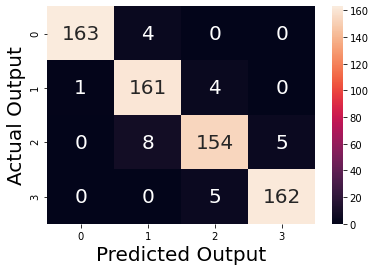

In [25]:
cm= confusion_matrix(y_test,y_pred1)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":20})
plt.xlabel('Predicted Output', fontsize=20)
plt.ylabel('Actual Output', fontsize=20)

In [26]:
pd.DataFrame(model1.coef_, columns=X.columns).T

,0,1,2,3
battery_power,-2.570400,-0.787413,0.768220,2.589593
blue,0.041060,0.014124,-0.008094,-0.047090
clock_speed,0.035909,-0.106560,-0.015259,0.085910
dual_sim,0.124280,0.044244,-0.109869,-0.058655
fc,0.011988,0.034412,-0.000110,-0.046290
four_g,-0.001873,0.013783,-0.065475,0.053564
int_memory,-0.178856,-0.048882,-0.015604,0.243342
m_dep,0.036630,0.092902,-0.068283,-0.061249
mobile_wt,0.376551,0.116142,-0.011002,-0.481690
n_cores,-0.075054,-0.090388,0.050155,0.115287


In [27]:
pd.DataFrame(model3.coef_, columns=X.columns).T

NameError: name 'model3' is not defined

# KNN



##### K-Nearest Neighbors

In [28]:
model2=KNeighborsClassifier(7)
model2.fit(X_train1,y_train)
y_pred2=model2.predict(X_test)
display(confusion_matrix(y_test,y_pred2))
print("Accuracy score: ", accuracy_score(y_test,y_pred2))
print("Precision score: ", precision_score(y_test,y_pred2,average='micro'))
print("Recall score: ", recall_score(y_test,y_pred2,average='micro'))
print("F1_score : ", f1_score(y_test,y_pred2,average='micro'))

array([[  0,   0,   0, 167],
       [  0,   0,   0, 166],
       [  0,   0,   0, 167],
       [  0,   0,   0, 167]])

Accuracy score:  0.25037481259370314
Precision score:  0.25037481259370314
Recall score:  0.25037481259370314
F1_score :  0.25037481259370314


# SVM

##### Support Vector Machine

In [29]:
model3=SVC()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
display(confusion_matrix(y_test,y_pred3))


array([[164,   3,   0,   0],
       [  3, 162,   1,   0],
       [  0,   9, 155,   3],
       [  0,   0,   9, 158]])

In [30]:
print("Accuracy score: ",accuracy_score(y_test,y_pred3))
print("Precision score: ",precision_score(y_test,y_pred3,average='macro'))
print("Recall score: ", recall_score(y_test,y_pred3,average='macro'))
print("F1_score: ", f1_score(y_test,y_pred3,average='macro'))

Accuracy score:  0.9580209895052474
Precision score:  0.9584577024809005
Recall score:  0.958047759901883
F1_score:  0.9580316696299196


# GaussianNB

#####  Gaussian Naive Bayes Implementation

In [31]:
model4=GaussianNB()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
display(confusion_matrix(y_test,y_pred4))

array([[153,  14,   0,   0],
       [ 11, 118,  37,   0],
       [  0,  31, 117,  19],
       [  0,   1,  16, 150]])

In [32]:
print("Accuracy score: ",accuracy_score(y_test,y_pred4))
print("Precision score: ",precision_score(y_test,y_pred4,average='macro'))
print("Recall score: ", recall_score(y_test,y_pred4,average='macro'))
print("F1_score: ", f1_score(y_test,y_pred4,average='macro'))

Accuracy score:  0.8065967016491754
Precision score:  0.8070620707512332
Recall score:  0.8064533583435538
F1_score:  0.806710493726617


# Decision Tree

In [33]:
model5=DecisionTreeClassifier()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
display(confusion_matrix(y_test,y_pred5))


array([[152,  15,   0,   0],
       [ 14, 129,  22,   1],
       [  0,  16, 130,  21],
       [  0,   0,  30, 137]])

In [34]:
print("Accuracy score: ",accuracy_score(y_test,y_pred5))
print("Precision score: ",precision_score(y_test,y_pred5,average='macro'))
print("Recall score: ", recall_score(y_test,y_pred5,average='macro'))
print("F1_score: ", f1_score(y_test,y_pred5,average='macro'))

Accuracy score:  0.8215892053973014
Precision score:  0.8244583962534775
Recall score:  0.8215226174157709
F1_score:  0.8224501066890366


# Random Forest

In [35]:
model6=RandomForestClassifier()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
display(confusion_matrix(y_test, y_pred6))

array([[159,   8,   0,   0],
       [  7, 142,  17,   0],
       [  0,  23, 132,  12],
       [  0,   0,  15, 152]])

In [36]:
print("Accuracy score: ",accuracy_score(y_test,y_pred6))
print("Precision score: ",precision_score(y_test,y_pred6,average='macro'))
print("Recall score: ", recall_score(y_test,y_pred6,average='macro'))
print("F1_score: ", f1_score(y_test,y_pred6,average='macro'))

Accuracy score:  0.8770614692653673
Precision score:  0.8775869727323222
Recall score:  0.8770290743813578
F1_score:  0.8771812879103739


In [37]:
print("Accuracy score: ",accuracy_score(y_test,y_pred6))
print("Precision score: ",precision_score(y_test,y_pred6,average='macro'))
print("Recall score: ", recall_score(y_test,y_pred6,average='macro'))
print("F1_score: ", f1_score(y_test,y_pred6,average='macro'))

Accuracy score:  0.8770614692653673
Precision score:  0.8775869727323222
Recall score:  0.8770290743813578
F1_score:  0.8771812879103739


# AdaBoost

In [38]:
model7=AdaBoostClassifier()
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)


In [39]:
print("Accuracy score: ",accuracy_score(y_test,y_pred7))
print("Precision score: ",precision_score(y_test,y_pred7,average='macro'))
print("Recall score: ", recall_score(y_test,y_pred7,average='macro'))
print("F1_score: ", f1_score(y_test,y_pred7,average='macro'))

Accuracy score:  0.6446776611694153
Precision score:  0.7331022927689594
Recall score:  0.6449029651540292
F1_score:  0.6416720627436887


# CatBoost

In [42]:
model8=CatBoostClassifier()
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
display(confusion_matrix(y_test, y_pred8))
print(accuracy_score(y_test, y_pred8))
print(precision_score(y_test, y_pred8,average='macro'))
print(recall_score(y_test, y_pred8,average='macro'))
print(f1_score(y_test, y_pred8,average='macro'))


Learning rate set to 0.080295
0:	learn: 1.2835835	total: 20.9ms	remaining: 20.8s
1:	learn: 1.1987105	total: 28.7ms	remaining: 14.3s
2:	learn: 1.1271622	total: 42.2ms	remaining: 14s
3:	learn: 1.0690878	total: 59.3ms	remaining: 14.8s
4:	learn: 1.0092913	total: 66.8ms	remaining: 13.3s
5:	learn: 0.9473099	total: 72.6ms	remaining: 12s
6:	learn: 0.8997709	total: 79.1ms	remaining: 11.2s
7:	learn: 0.8577421	total: 88.2ms	remaining: 10.9s
8:	learn: 0.8185971	total: 92.6ms	remaining: 10.2s
9:	learn: 0.7855083	total: 96.8ms	remaining: 9.58s
10:	learn: 0.7499695	total: 102ms	remaining: 9.15s
11:	learn: 0.7148885	total: 106ms	remaining: 8.76s
12:	learn: 0.6902731	total: 112ms	remaining: 8.52s
13:	learn: 0.6664096	total: 118ms	remaining: 8.31s
14:	learn: 0.6448187	total: 122ms	remaining: 8.02s
15:	learn: 0.6262293	total: 128ms	remaining: 7.88s
16:	learn: 0.6128787	total: 132ms	remaining: 7.63s
17:	learn: 0.5963268	total: 140ms	remaining: 7.65s
18:	learn: 0.5791307	total: 150ms	remaining: 7.73s
19:	l

162:	learn: 0.1321215	total: 1.24s	remaining: 6.36s
163:	learn: 0.1314045	total: 1.27s	remaining: 6.49s
164:	learn: 0.1307621	total: 1.29s	remaining: 6.55s
165:	learn: 0.1296822	total: 1.3s	remaining: 6.53s
166:	learn: 0.1286525	total: 1.3s	remaining: 6.51s
167:	learn: 0.1281915	total: 1.31s	remaining: 6.48s
168:	learn: 0.1278106	total: 1.31s	remaining: 6.46s
169:	learn: 0.1272384	total: 1.32s	remaining: 6.47s
170:	learn: 0.1264569	total: 1.34s	remaining: 6.48s
171:	learn: 0.1256313	total: 1.34s	remaining: 6.45s
172:	learn: 0.1250547	total: 1.35s	remaining: 6.43s
173:	learn: 0.1242396	total: 1.36s	remaining: 6.44s
174:	learn: 0.1237665	total: 1.36s	remaining: 6.43s
175:	learn: 0.1230956	total: 1.37s	remaining: 6.4s
176:	learn: 0.1224956	total: 1.38s	remaining: 6.39s
177:	learn: 0.1217914	total: 1.39s	remaining: 6.4s
178:	learn: 0.1210950	total: 1.39s	remaining: 6.38s
179:	learn: 0.1202097	total: 1.39s	remaining: 6.35s
180:	learn: 0.1194558	total: 1.4s	remaining: 6.34s
181:	learn: 0.119

340:	learn: 0.0636383	total: 2.2s	remaining: 4.25s
341:	learn: 0.0634357	total: 2.21s	remaining: 4.25s
342:	learn: 0.0631104	total: 2.21s	remaining: 4.24s
343:	learn: 0.0629400	total: 2.22s	remaining: 4.23s
344:	learn: 0.0627551	total: 2.22s	remaining: 4.22s
345:	learn: 0.0624280	total: 2.23s	remaining: 4.21s
346:	learn: 0.0622307	total: 2.23s	remaining: 4.2s
347:	learn: 0.0619503	total: 2.24s	remaining: 4.19s
348:	learn: 0.0617560	total: 2.24s	remaining: 4.18s
349:	learn: 0.0616629	total: 2.24s	remaining: 4.17s
350:	learn: 0.0615446	total: 2.25s	remaining: 4.17s
351:	learn: 0.0614891	total: 2.26s	remaining: 4.16s
352:	learn: 0.0612963	total: 2.26s	remaining: 4.15s
353:	learn: 0.0611522	total: 2.27s	remaining: 4.14s
354:	learn: 0.0609600	total: 2.27s	remaining: 4.13s
355:	learn: 0.0607920	total: 2.28s	remaining: 4.12s
356:	learn: 0.0606287	total: 2.29s	remaining: 4.12s
357:	learn: 0.0604997	total: 2.29s	remaining: 4.11s
358:	learn: 0.0601890	total: 2.3s	remaining: 4.1s
359:	learn: 0.06

511:	learn: 0.0394921	total: 3.39s	remaining: 3.23s
512:	learn: 0.0393930	total: 3.41s	remaining: 3.24s
513:	learn: 0.0392976	total: 3.42s	remaining: 3.23s
514:	learn: 0.0391454	total: 3.43s	remaining: 3.23s
515:	learn: 0.0390722	total: 3.45s	remaining: 3.23s
516:	learn: 0.0389938	total: 3.46s	remaining: 3.23s
517:	learn: 0.0388893	total: 3.46s	remaining: 3.22s
518:	learn: 0.0388038	total: 3.46s	remaining: 3.21s
519:	learn: 0.0386712	total: 3.47s	remaining: 3.2s
520:	learn: 0.0385328	total: 3.47s	remaining: 3.19s
521:	learn: 0.0384656	total: 3.48s	remaining: 3.18s
522:	learn: 0.0383093	total: 3.48s	remaining: 3.17s
523:	learn: 0.0382408	total: 3.48s	remaining: 3.17s
524:	learn: 0.0381959	total: 3.49s	remaining: 3.16s
525:	learn: 0.0381067	total: 3.49s	remaining: 3.15s
526:	learn: 0.0380318	total: 3.5s	remaining: 3.14s
527:	learn: 0.0379498	total: 3.51s	remaining: 3.13s
528:	learn: 0.0378791	total: 3.52s	remaining: 3.13s
529:	learn: 0.0377818	total: 3.52s	remaining: 3.12s
530:	learn: 0.

706:	learn: 0.0264249	total: 4.34s	remaining: 1.8s
707:	learn: 0.0263685	total: 4.35s	remaining: 1.79s
708:	learn: 0.0263121	total: 4.36s	remaining: 1.79s
709:	learn: 0.0262560	total: 4.37s	remaining: 1.78s
710:	learn: 0.0262121	total: 4.37s	remaining: 1.78s
711:	learn: 0.0261595	total: 4.37s	remaining: 1.77s
712:	learn: 0.0261128	total: 4.38s	remaining: 1.76s
713:	learn: 0.0260781	total: 4.38s	remaining: 1.76s
714:	learn: 0.0260043	total: 4.39s	remaining: 1.75s
715:	learn: 0.0259599	total: 4.39s	remaining: 1.74s
716:	learn: 0.0258838	total: 4.4s	remaining: 1.74s
717:	learn: 0.0258265	total: 4.4s	remaining: 1.73s
718:	learn: 0.0257653	total: 4.41s	remaining: 1.72s
719:	learn: 0.0257376	total: 4.42s	remaining: 1.72s
720:	learn: 0.0256838	total: 4.42s	remaining: 1.71s
721:	learn: 0.0256275	total: 4.43s	remaining: 1.7s
722:	learn: 0.0255809	total: 4.43s	remaining: 1.7s
723:	learn: 0.0255501	total: 4.43s	remaining: 1.69s
724:	learn: 0.0255212	total: 4.44s	remaining: 1.69s
725:	learn: 0.025

883:	learn: 0.0199149	total: 5.34s	remaining: 701ms
884:	learn: 0.0198994	total: 5.35s	remaining: 695ms
885:	learn: 0.0198624	total: 5.36s	remaining: 690ms
886:	learn: 0.0198414	total: 5.37s	remaining: 684ms
887:	learn: 0.0198101	total: 5.38s	remaining: 678ms
888:	learn: 0.0197947	total: 5.38s	remaining: 672ms
889:	learn: 0.0197392	total: 5.39s	remaining: 666ms
890:	learn: 0.0197247	total: 5.39s	remaining: 660ms
891:	learn: 0.0197007	total: 5.39s	remaining: 653ms
892:	learn: 0.0196485	total: 5.4s	remaining: 647ms
893:	learn: 0.0196341	total: 5.41s	remaining: 641ms
894:	learn: 0.0196122	total: 5.41s	remaining: 635ms
895:	learn: 0.0195888	total: 5.42s	remaining: 629ms
896:	learn: 0.0195619	total: 5.42s	remaining: 623ms
897:	learn: 0.0195402	total: 5.43s	remaining: 617ms
898:	learn: 0.0195101	total: 5.43s	remaining: 611ms
899:	learn: 0.0194658	total: 5.44s	remaining: 605ms
900:	learn: 0.0194475	total: 5.45s	remaining: 599ms
901:	learn: 0.0194214	total: 5.45s	remaining: 592ms
902:	learn: 0

array([[162,   5,   0,   0],
       [  3, 159,   4,   0],
       [  0,  10, 151,   6],
       [  0,   0,   8, 159]])

0.9460269865067467
0.9464070042502453
0.9460446576726066
0.9460451431394026


In [43]:
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3,average='macro'))
print(recall_score(y_test, y_pred3,average='macro'))
print(f1_score(y_test, y_pred3,average='macro'))

0.9580209895052474
0.9584577024809005
0.958047759901883
0.9580316696299196


In [44]:
model8.feature_importances_

array([15.5456879 ,  0.11234122,  1.15284414,  0.17279132,  0.7518283 ,
        0.22508584,  1.60329212,  1.15441352,  2.76975384,  1.0603247 ,
        1.28507424,  7.65231621,  8.1291189 , 54.03820566,  1.05259977,
        0.98542768,  1.45733452,  0.24963779,  0.3639088 ,  0.23801354])

In [ ]:
from sklearn.svm import SVR
model3=SVR(kernel='linear')
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
display(confusion_matrix(y_test,y_pred3))


In [71]:
X_train.shape

(1333, 20)

In [75]:
model3.intercept_

array([426.71123799,   7.46997166,   4.09520888, 234.13723231,
         9.89314172, 201.12468925])

In [72]:
pd.DataFrame(model3.coef_, columns=X_train.columns).T

,0,1,2,3,4,5
battery_power,-0.111554,-1.466274e-03,-7.139376e-04,-0.041999,-1.533686e-03,-0.027996
blue,-0.357958,-6.682238e-07,-4.832232e-07,0.264862,-2.495936e-06,0.450130
clock_speed,0.755741,2.429890e-06,6.928701e-07,-0.243314,1.144369e-06,0.308560
dual_sim,-0.150903,-6.682238e-07,-5.776793e-07,0.622480,-2.495936e-06,-0.688229
fc,0.237499,-1.959705e-05,-2.036927e-06,-0.231055,8.928441e-06,0.184854
four_g,-0.146709,3.924375e-07,-2.161242e-07,0.278598,-1.035992e-06,0.229153
int_memory,-0.077793,-1.168896e-04,-1.615418e-05,-0.060652,-4.500838e-06,-0.054288
m_dep,0.097941,-6.460399e-08,3.046688e-07,0.513050,3.554386e-06,0.380793
mobile_wt,0.240559,3.130353e-04,9.818920e-05,0.049433,4.052386e-04,0.073096
n_cores,-1.338225,4.015825e-06,-2.161242e-07,-0.482025,8.479026e-07,-0.121215


#  Model Comparison

In [63]:
a,p,r,f,m=[],[],[],[],[]
for model in [model1, model2, model3, model4, model5, model6, model7,model8]:
    a.append(accuracy_score(y_test, model.predict(X_test)))
    p.append(precision_score(y_test, model.predict(X_test),average='micro'))
    r.append(recall_score(y_test, model.predict(X_test),average='micro'))
    f.append(f1_score(y_test, model.predict(X_test),average='micro'))
    m.append(NM(y_test, model.predict(X_test).ravel()))

In [62]:
pd.DataFrame([a,p,r,f,m], columns=['LR','KNN','SVM','NB','DT','RF','Ada','Cat']).T.sort_values(by=2)

,0,1,2,3,4
LR,0.250375,0.250375,0.250375,0.250375,108.345827
KNN,0.250375,0.250375,0.250375,0.250375,108.345827
Ada,0.644678,0.644678,0.644678,0.644678,20.977011
NB,0.806597,0.806597,0.806597,0.806597,8.870565
DT,0.823088,0.823088,0.823088,0.823088,8.420790
RF,0.881559,0.881559,0.881559,0.881559,5.134933
Cat,0.946027,0.946027,0.946027,0.946027,2.373813
SVM,0.958021,0.958021,0.958021,0.958021,1.686657


## Custom Metric to verify which model is better

###### [Y_actual - Y_Predicted)/(Y_actual+1)]

The lower the better

Explanation:
    if predicted price > actual price: OK (will gain money maybe loosing some clients)
    if predicted price < actual price: NOT OK (company will loose money)

$\frac{y-\hat{y}}{\hat{y}+1}$

In [55]:
def NM (Y_actual,Y_Predicted):
    nm = np.mean(np.abs((Y_actual - Y_Predicted)/(Y_actual+1)))*100
    return nm

In [49]:
y_test-model1.predict(X_test)

121     0
1702   -1
1358   -2
419    -3
52      0
       ..
687    -3
625    -2
387    -2
51     -1
1559   -1
Name: price_range, Length: 667, dtype: int64

In [48]:
NM(y_test, model6.predict(X_test).ravel())

NameError: name 'NM' is not defined

In [46]:
s=pd.Series(model8.feature_importances_, index=X.columns)

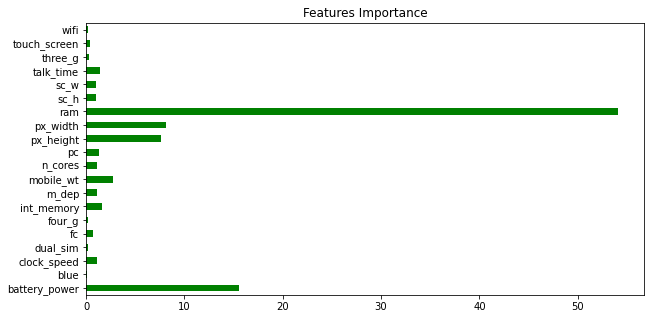

In [47]:
s.plot.barh(figsize=(10,5),color='green',title='Features Importance')

In [ ]:
#NM(y_test, model6.predict(X_test).ravel())